In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import statsmodels.api as sm

In [4]:
dane_leki = pd.read_excel('dane_leki.xlsx')
dane_leki = dane_leki.drop("Unnamed: 0",axis=1)


In [5]:
dane_leki.head()

,Nazwa,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór
0,acetaminophen,-0.79,-0.63,2,0,2,t
1,acetylsalicylic acid,-0.23,1.22,1,0,4,t
2,bromazepam,0.38,0.57,1,0,3,t
3,carbamazepine,0.69,0.68,0,0,3,t
4,chlorpromazine,1.18,1.50,0,0,2,t


In [6]:
correla  = dane_leki.corr()
correla 

C:\Users\Michał\AppData\Local\Temp\ipykernel_16388\34077217.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correla  = dane_leki.corr()


,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA
logK HSA,1.000000,0.799757,-0.720084,0.598914,-0.306897
logKCTAB,0.799757,1.000000,-0.633481,0.446144,-0.135951
CATS3D_00_DD,-0.720084,-0.633481,1.000000,-0.291248,0.290864
CATS3D_09_AL,0.598914,0.446144,-0.291248,1.000000,0.326375
CATS3D_00_AA,-0.306897,-0.135951,0.290864,0.326375,1.000000


CORRELATION 

In [ ]:
list_of_names = list(correla)
for col_name in list_of_names:
    for i,col_name_y in enumerate(list_of_names):
        x = correla.get(col_name) 
        y = correla.iloc[i]
        plt.scatter(x,y)
        plt.xlabel(col_name)
        plt.ylabel(col_name_y)
        plt.show()


HEATMAP

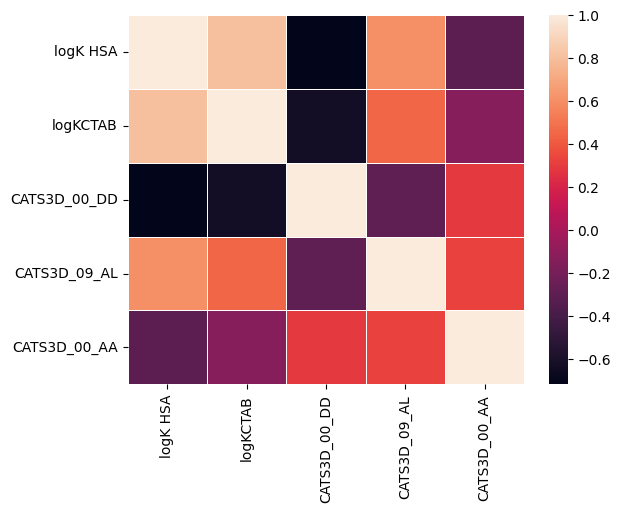

In [8]:
ax = sns.heatmap(correla, linewidth=0.5)
plt.show()

RÓWNANIE MODELU 

In [9]:
dane_leki.head()

,Nazwa,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór
0,acetaminophen,-0.79,-0.63,2,0,2,t
1,acetylsalicylic acid,-0.23,1.22,1,0,4,t
2,bromazepam,0.38,0.57,1,0,3,t
3,carbamazepine,0.69,0.68,0,0,3,t
4,chlorpromazine,1.18,1.50,0,0,2,t


R^2

In [10]:
X = pd.DataFrame(dane_leki[['logKCTAB','CATS3D_00_DD','CATS3D_09_AL','CATS3D_00_AA']])
Y = pd.DataFrame(dane_leki['logK HSA'])
X = sm.add_constant(X)
statOLS = sm.OLS(Y,X).fit()
print(statOLS.summary())


                            OLS Regression Results                            
Dep. Variable:               logK HSA   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     36.15
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           2.25e-09
Time:                        13:54:51   Log-Likelihood:                -12.547
No. Observations:                  27   AIC:                             35.09
Df Residuals:                      22   BIC:                             41.57
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6561      0.242      2.710   

RÓWNANIE MODELU

równanie_modelu=0.6561+0.5583*logKCTAB +(-0.2020)*CATS3D_00_DD+0.2740*CATS3D_09_AL+-0.1881*CATS3D_00_AA

In [11]:
y_pred = 0.6561 + 0.5583*dane_leki['logKCTAB'] + (-0.2020 * dane_leki['CATS3D_00_DD']+0.2740*dane_leki['CATS3D_09_AL']+ (-0.1881*dane_leki['CATS3D_00_AA']))
y_pred
dane_leki['y_pred'] = y_pred
dane_leki

,Nazwa,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór,y_pred
0,acetaminophen,-0.79,-0.63,2,0,2,t,-0.475829
1,acetylsalicylic acid,-0.23,1.22,1,0,4,t,0.382826
2,bromazepam,0.38,0.57,1,0,3,t,0.208031
3,carbamazepine,0.69,0.68,0,0,3,t,0.471444
4,chlorpromazine,1.18,1.50,0,0,2,t,1.117350
5,clonidine,-0.42,0.26,2,0,1,t,0.209158
6,diazepam,1.08,1.25,0,0,3,t,0.789675
7,diltiazem,0.06,1.09,0,3,6,t,0.958047
8,diphenhydramine,0.08,0.46,0,0,2,t,0.536718
9,fluoxetine,1.39,0.73,1,0,1,t,0.673559


RMSE_c - treningowy


In [12]:
logKHSA = dane_leki['logK HSA']
MSE = np.square(np.subtract(logKHSA[dane_leki['Zbiór']=='t'],y_pred[dane_leki['Zbiór'] == 't'])).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.4318141468484719


RMSE_ex - testowy 

In [13]:
logKHSA = dane_leki['logK HSA']
MSE = np.square(np.subtract(logKHSA[dane_leki['Zbiór']=='w'],y_pred[dane_leki['Zbiór'] == 'w'])).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.24019618206634755


Q_2ex


In [14]:
def Q_2():
    mean_pred = y_pred.mean()
    licznik__ = y_pred[dane_leki['Zbiór']=='w'] - logKHSA[dane_leki['Zbiór']=='w']
    licznik = sum(licznik__**2)
    mianownik__ = y_pred - mean_pred
    mianownik = sum(mianownik__**2)
    return 1 - (licznik / mianownik)

In [15]:
Q_2()

0.9824608755287637

WYKRES WILLIAMSA

In [16]:
h = (3*4 + 1) / len(logKCTAB)
h

NameError: name 'logKCTAB' is not defined